# This notebook summarizes the results from Assignment 3

In [1]:
from src.EigenmodesTimeIndependent import *
from src.EigenmodesTimeDependent import *
from src.DirectSteadyState import *

### First, we plot the laplace matrix for a 4x4 system for all three domain shapes

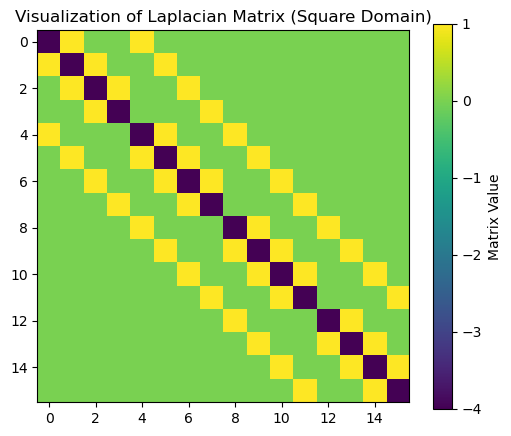

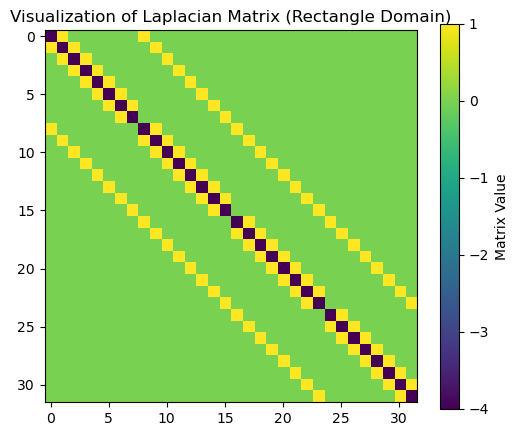

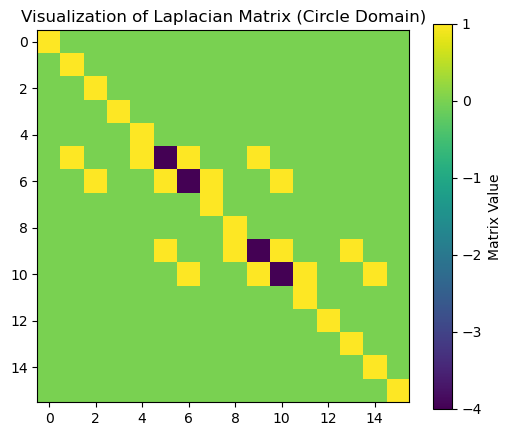

In [8]:
N = 4
domains = ["square", "rectangle", "circle"]

for domain in domains:
    results = simulate_domain(domain, N)       
    plot_matrix(results, domain)

### Now, we plot the first few eigenvectors as 2d arrays given a larger N

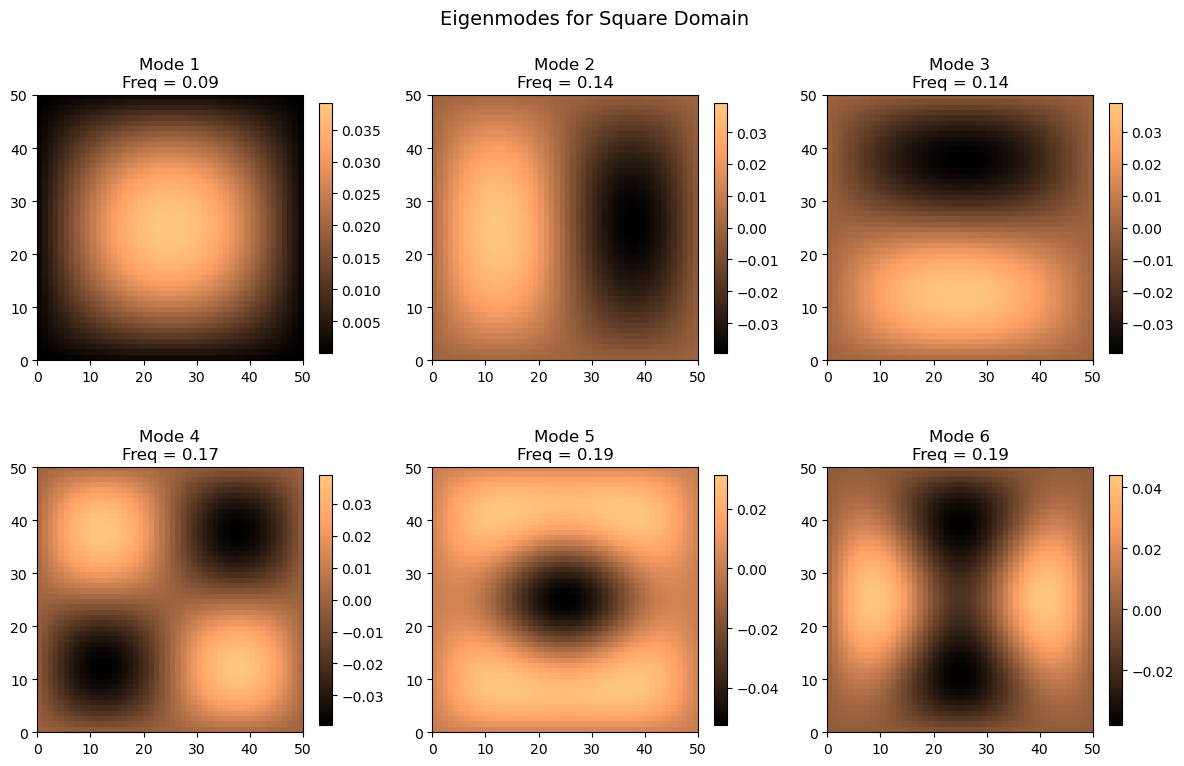

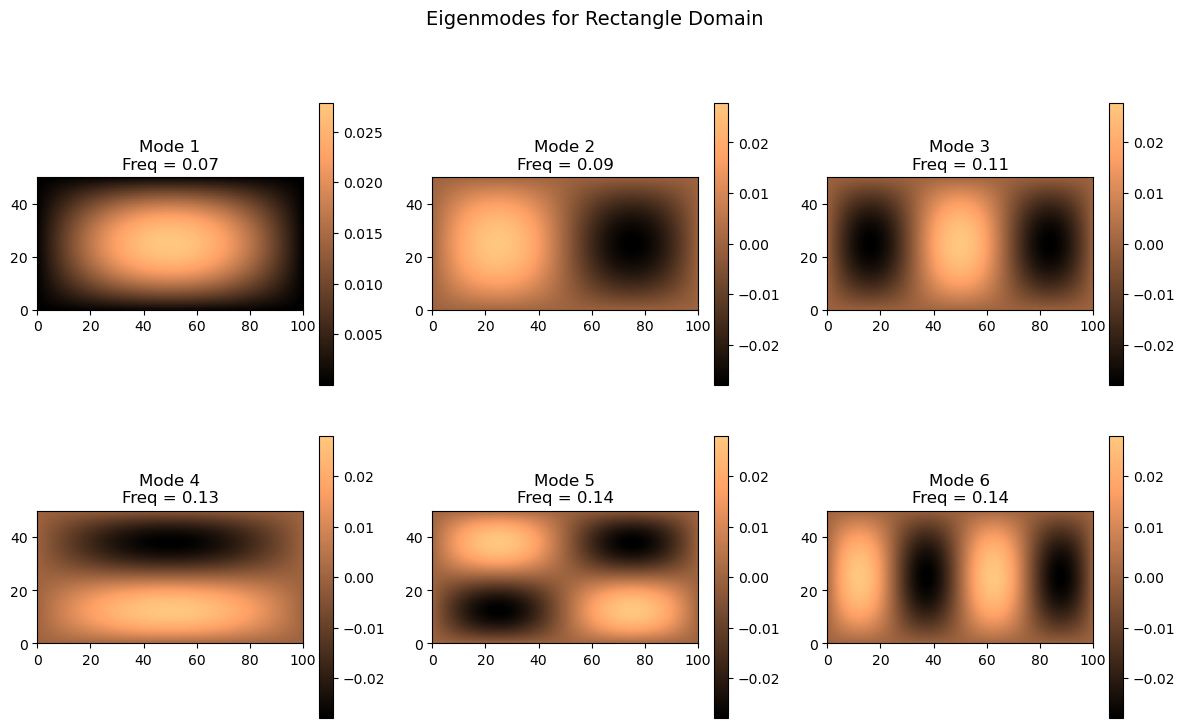

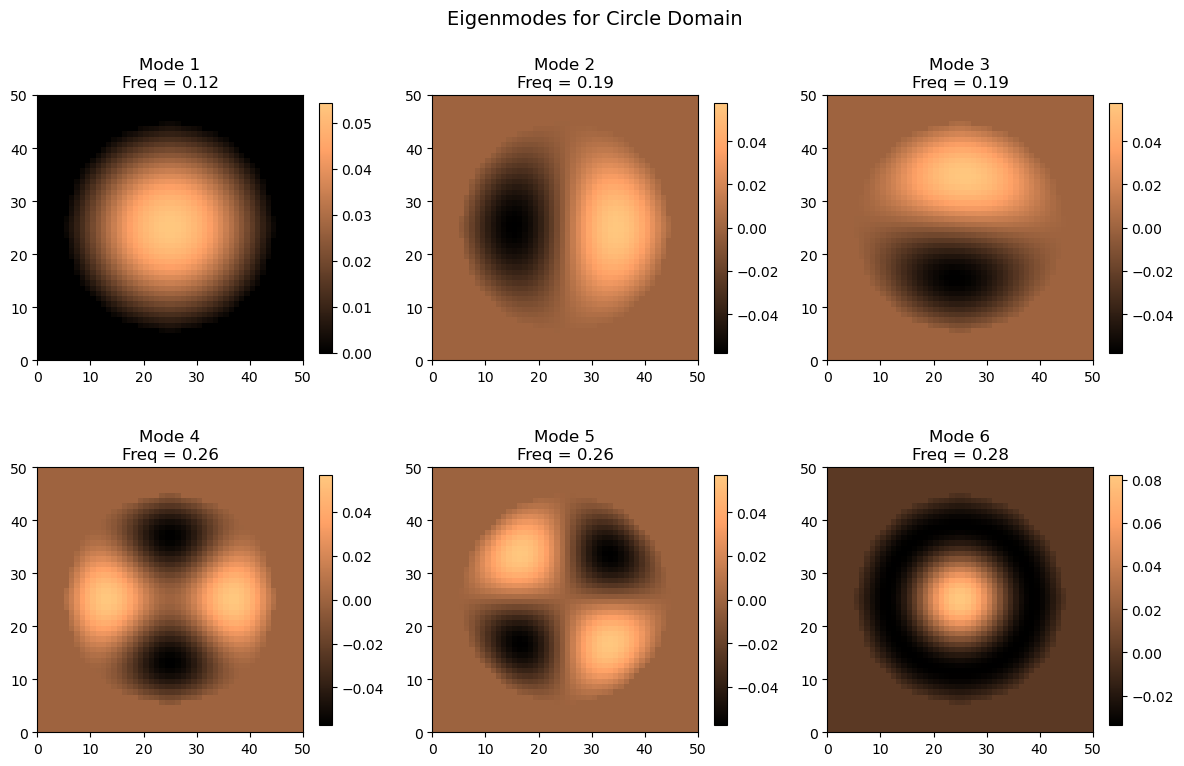

In [9]:
N = 50
domains = ["square", "rectangle", "circle"]

for domain in domains:
    results = simulate_domain(domain, N)       
    plot_eigenmodes(results, domain)

### Now we compare the performance between sparse and dense solvers


Running performance test for square domain:

Comparing solvers for the square domain with grid size parameter N = 30 over 10 runs
Sparse solver (spla.eigs) mean time: 0.070090 seconds, std: 0.008720 seconds
Dense solver (scipy.linalg.eigh) mean time: 0.326121 seconds, std: 0.021804 seconds

Eigenvalues from the last run of the sparse solver:
[-0.02052271 -0.05120147 -0.05120147 -0.08188023 -0.10198284 -0.10198284]

Eigenvalues from the last run of the dense solver:
[-0.02052271 -0.05120147 -0.05120147 -0.08188023 -0.10198284 -0.10198284]

Running performance test for rectangle domain:

Comparing solvers for the rectangle domain with grid size parameter N = 30 over 10 runs
Sparse solver (spla.eigs) mean time: 0.155665 seconds, std: 0.022811 seconds
Dense solver (scipy.linalg.eigh) mean time: 0.744046 seconds, std: 0.069017 seconds

Eigenvalues from the last run of the sparse solver:
[-0.01291317 -0.0208616  -0.03408556 -0.04359194 -0.05154037 -0.05254998]

Eigenvalues from the last run

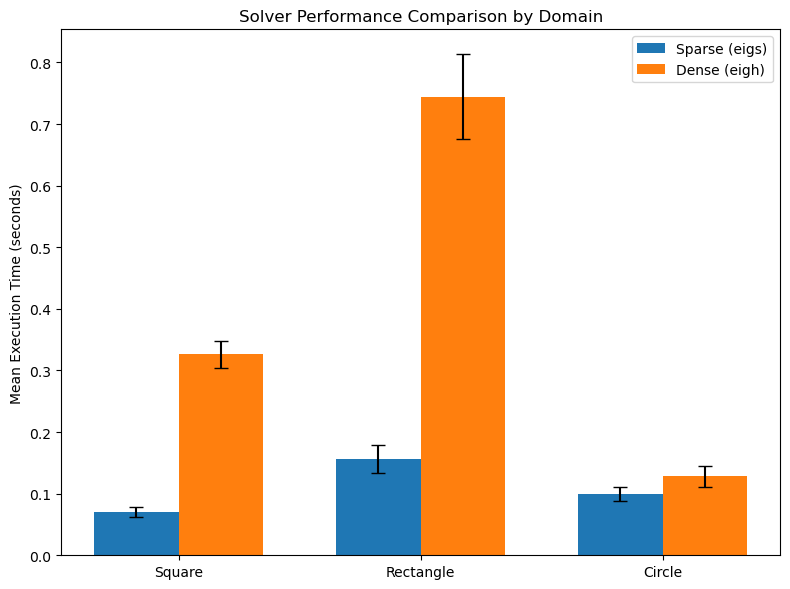

In [10]:
N = 30       # Grid size parameter (adjust as needed)
num_runs = 10  # Number of runs for performance timing

# Define the domains to test
domains = ["square", "rectangle", "circle"]
performance_stats = {}

# Run performance tests for each domain and store the statistics
for domain in domains:
    print(f"\nRunning performance test for {domain} domain:")
    _, _, stats = compare_solver_performance(domain, N, num_runs)
    performance_stats[domain] = stats

# Plot the performance statistics using the new function
plot_performance_stats(performance_stats, domains)

### Now, we investigate how the domain size affects the eigenfrequencies

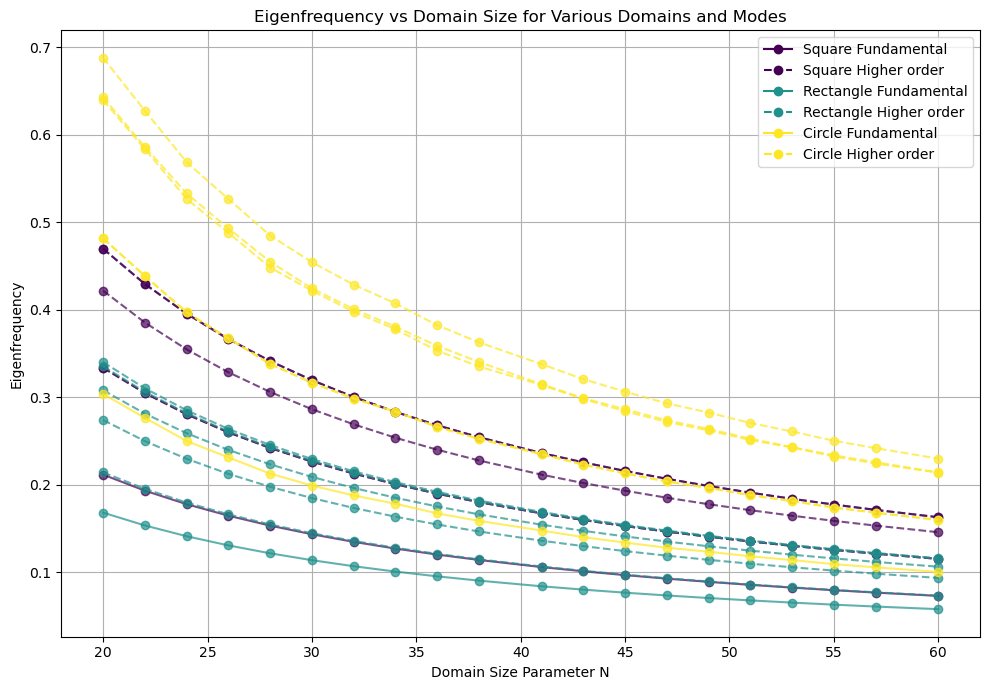

In [11]:
N_values = np.linspace(20, 60, 20, dtype=int)

plot_domains_frequency_vs_N(domains, N_values, solver="sparse", k=6)

### Animations of time dependent solutions

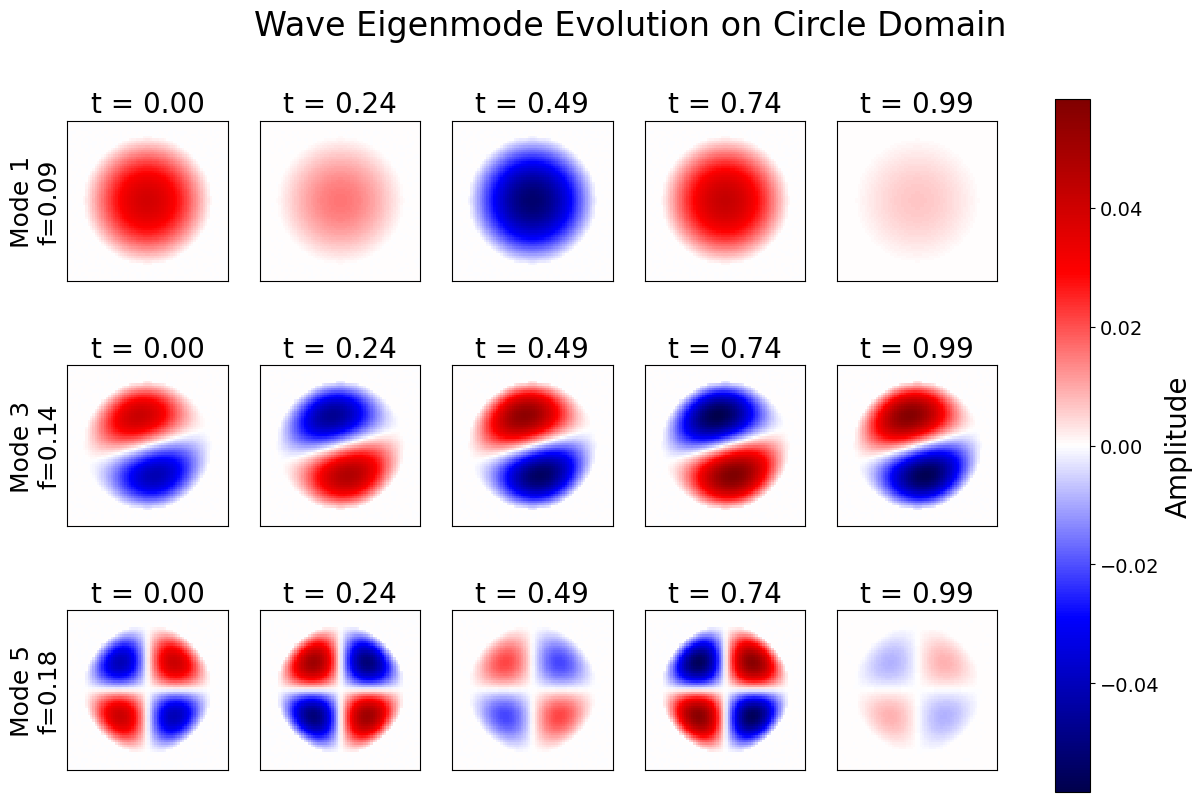

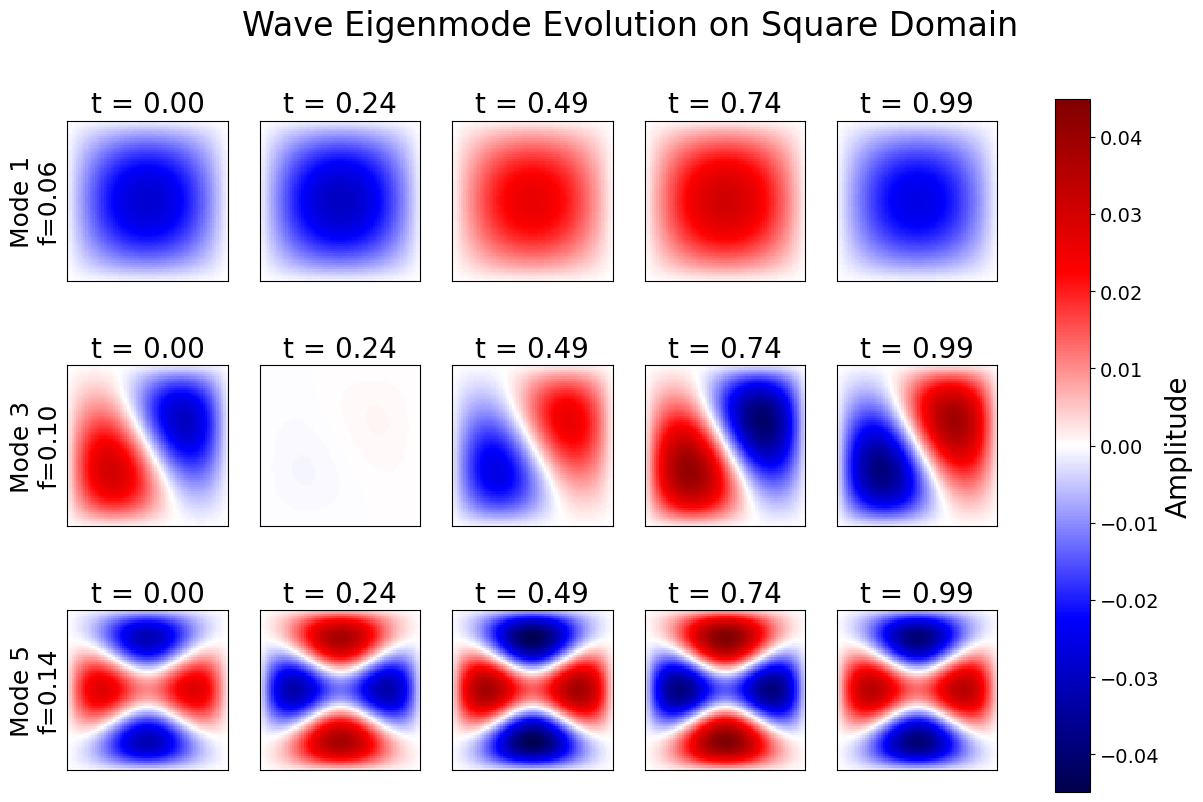

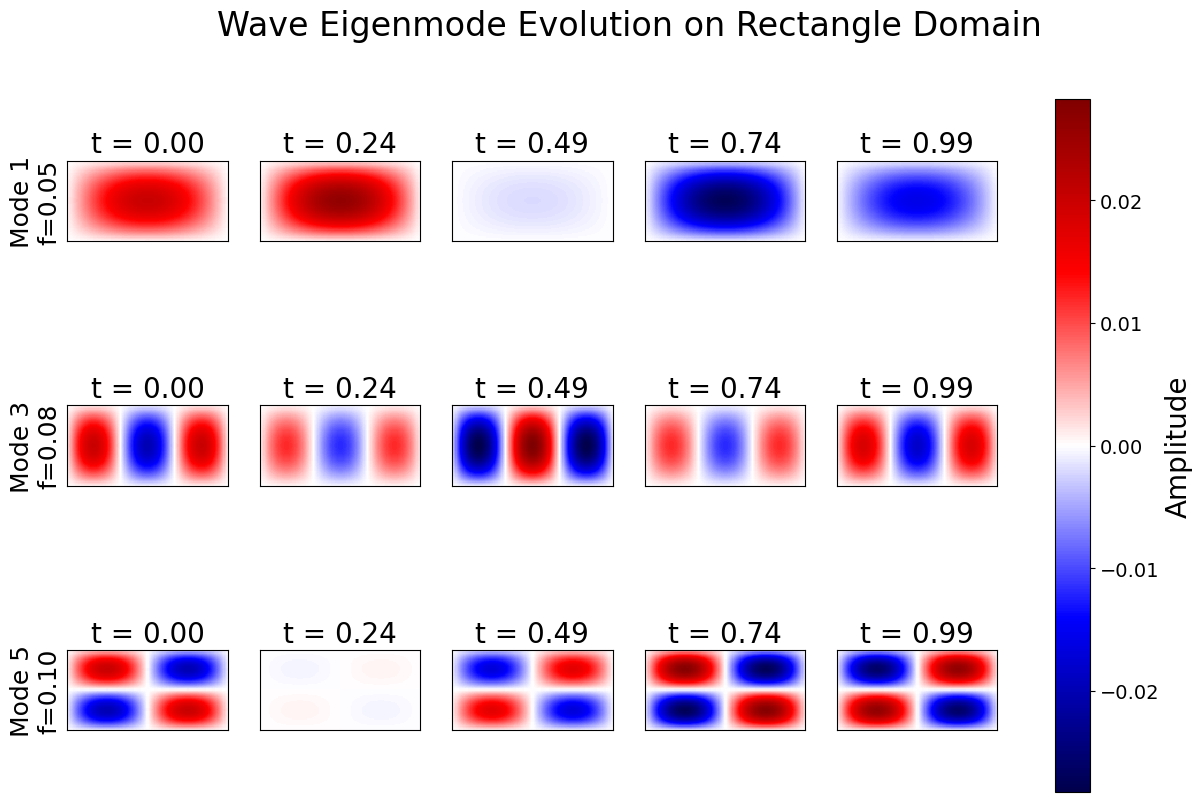

In [3]:
N = 70           # grid resolution
time_steps = 100 # number of time frames
domains = ['circle', 'square', 'rectangle']  # choose from 'square', 'rectangle', 'circle', etc.
    
# Static multi-mode evolution plot
for d in domains:
    fig_static = plot_mode_evolution(
    N, time_steps, d, mode_indices=[0, 2, 4],
    num_frames=5, save_path=f"{d}_static_modes_evolution.png"
    )

### Plotting of steady state solution

Source index: 93


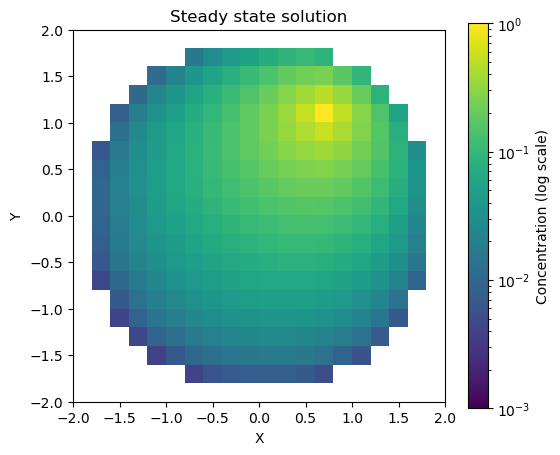

In [15]:
N = 20
radius = 2.0
x = solve_steady_state(N, radius)

# Plot the solution with log scale
plt.figure(figsize=(6, 5))
plt.imshow(x.reshape(N, N), cmap='viridis', extent=(-radius, radius, -radius, radius),
        norm=LogNorm(vmin=np.max(x) * 1e-3, vmax=np.max(x)))
plt.colorbar(label="Concentration (log scale)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Steady state solution")
plt.savefig("fig/SteadyState.png")
plt.show()